In [1]:
import sys
from pathlib import Path

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    # main,
)

modkit found with expected version 0.2.4


System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.99 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 2925 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2925   0% | 00:00<…

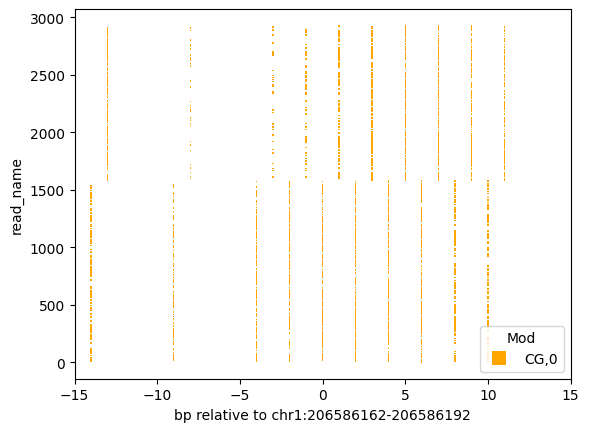

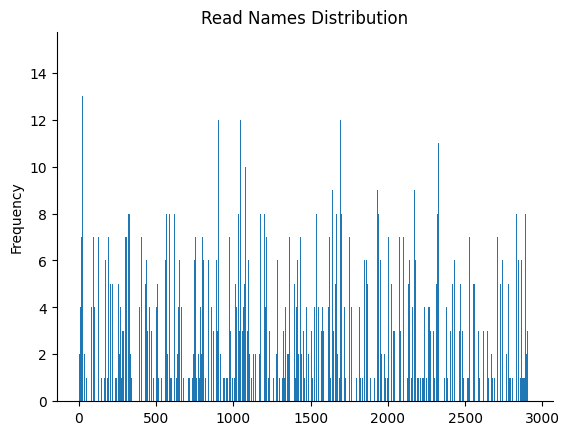

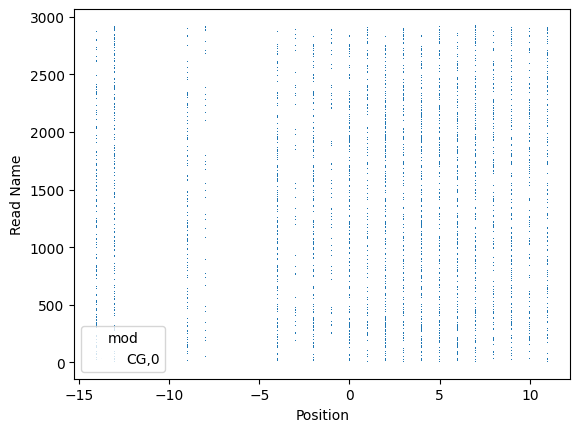

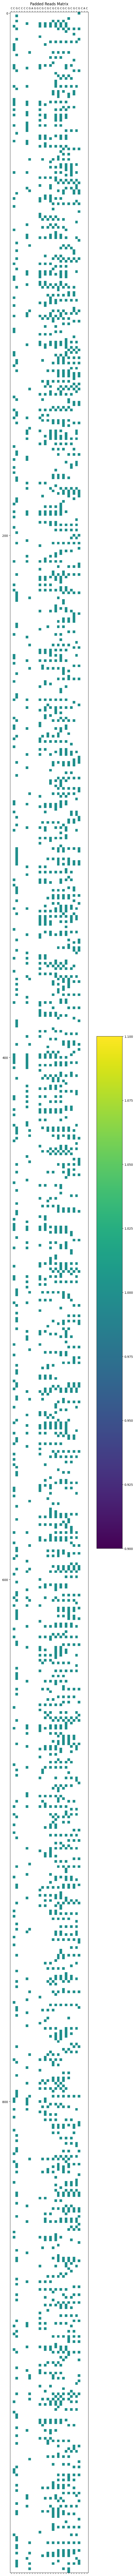

Padded reads saved to padded_reads.npy


In [2]:

def main():
    """Main function to execute all tasks."""
    system_info()

    ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
    # t2t_v1_1_cd55_30bps     # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
    region_chr = 'chr1'
    region_start = 206586162
    region_end = 206586192
    region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
    region_length = region_end - region_start
    print("region_length", region_length)

    motifs=['CG,0']
    ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)

    output_dir = create_output_directory("./dimelo_v2_output")

    unedited_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

    extract_file, extract_regions = extract_from_bam(
        bam_path=unedited_bam_path,
        ref_genome_file=ref_genome_v1_1_file,
        output_dir=output_dir,
        regions=region_str,
        motifs=motifs,
        output_name='extracted_reads'
    )

    if extract_file:
        df, regions_dict = process_extracted_reads(extract_file, region_str, motifs)
        visualize_data(df)

        padded_reads = create_padded_reads(df, regions_dict, region_length)
        if padded_reads is not None:
            plot_padded_reads(padded_reads, ref_seq_list)
            save_padded_reads(padded_reads, output_dir, "padded_reads.npy")

if __name__ == "__main__":
    main()